In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data = pd.read_csv("train.csv")
print(data.head())

      id                                              tweet label
0  86426  @USER She should ask a few native Americans wh...   UNT
1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...   TIN
2  16820  Amazon is investigating Chinese employees who ...   NOT
3  62688  @USER Someone should'veTaken" this piece of sh...   UNT
4  43605  @USER @USER Obama wanted liberals &amp; illega...   NOT


<Axes: xlabel='label', ylabel='count'>

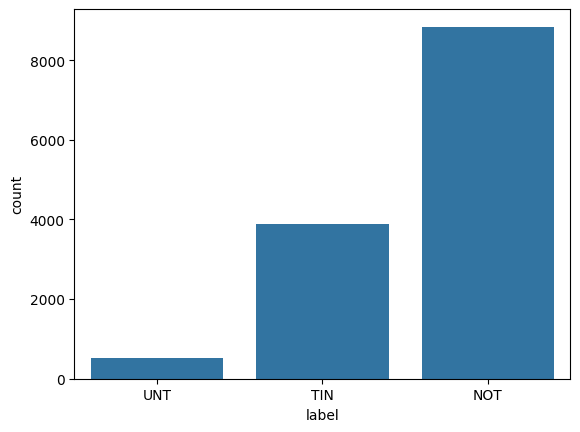

In [3]:
#data visualization
sns.countplot(x=data['label'])

In [4]:
# Checking if there is any null values in dataset
x = data.isnull().sum()
y = (data.isnull().sum()/data.shape[0])*100
z = {'total number of missing values':x,'percentage of missing values':y}
df = pd.DataFrame(z,columns=['total number of missing values','percentage of missing values'])
df.sort_values(by='percentage of missing values', ascending=False)
print(df)

       total number of missing values  percentage of missing values
id                                  0                           0.0
tweet                               0                           0.0
label                               0                           0.0


In [5]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text_lower = text.lower()
    text_tokens = word_tokenize(text_lower)
    text_sentence = ' '.join(text_tokens)
    tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tweet_tokens = tknzr.tokenize(text_sentence)
    tokens_without_stopwords = [word for word in tweet_tokens if word not in stopwords.words('english')]
    preprocessed_t = ' '.join(tokens_without_stopwords)
    return preprocessed_t



In [6]:
data['tweet_clean'] = data['tweet'].apply(preprocess_text)

In [7]:
print(data['tweet_clean'].head())

0                       user ask native americans take
1    user user go home youre drunk user maga trump url
2    amazon investigating chinese employees selling...
3        user someone shouldvetaken piece shit volcano
4    user user obama wanted liberals amp illegals m...
Name: tweet_clean, dtype: object


Classification Report using Logistic Regression               precision    recall  f1-score   support

         NOT       0.74      0.95      0.83      1733
         TIN       0.70      0.37      0.49       792
         UNT       0.40      0.02      0.03       123

    accuracy                           0.73      2648
   macro avg       0.61      0.45      0.45      2648
weighted avg       0.71      0.73      0.69      2648

Accuracy of logistic regression = 0.7348942598187311


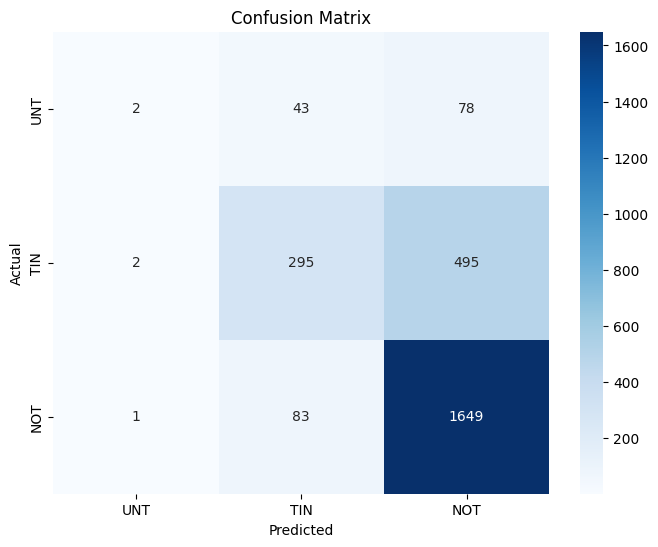

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

tfidf_vector = TfidfVectorizer()
x=tfidf_vector.fit_transform(data['tweet_clean'])

x_train,x_val,y_train,y_val = train_test_split(x,data['label'], test_size=0.2,random_state=42)
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(x_train,y_train)

y_pred = logistic_regression.predict(x_val)

class_report = classification_report(y_val, y_pred)

accuracy_logistic = accuracy_score(y_val, y_pred)
print("Classification Report using Logistic Regression", class_report)
print("Accuracy of logistic regression =",accuracy_logistic)

cm = confusion_matrix(y_val, y_pred, labels=data['label'].unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['label'].unique(), yticklabels=data['label'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Now using test dataset for prediction
predict_data = pd.read_csv('test.csv')
X_test = tfidf_vector.transform(predict_data['tweet'])
predictions = logistic_regression.predict(X_test)
predict_data['Prediction'] = predictions
predict_data.to_csv('Result_Logistic.csv', index=False)
#predict_data.to_csv('/prediction_output.csv', index=False)
print(predictions)

['TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'TIN' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'TIN' 'TIN' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'TIN'
 'TIN' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT'
 'NOT' 'TIN' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'TIN' 'NOT'
 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'N

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report using Logistic Regression
              precision    recall  f1-score   support

         NOT       0.68      1.00      0.81      3533
         TIN       0.79      0.07      0.13      1548
         UNT       0.00      0.00      0.00       215

    accuracy                           0.69      5296
   macro avg       0.49      0.36      0.31      5296
weighted avg       0.69      0.69      0.58      5296

Accuracy of logistic regression = 0.6867447129909365
 


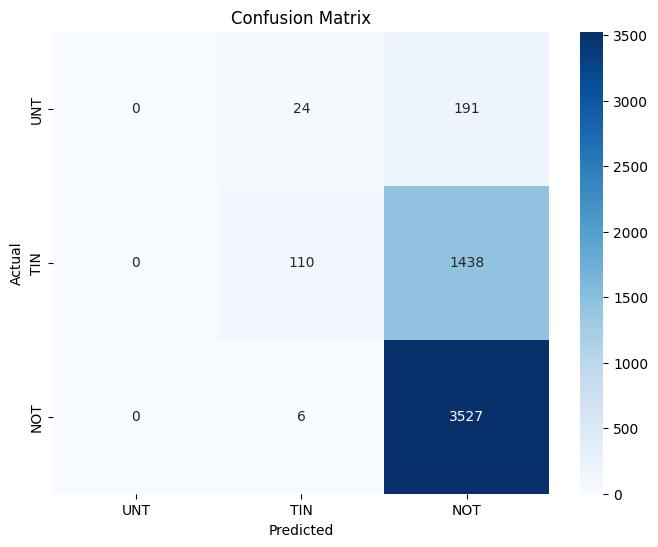

In [10]:
# now checking with another model naive_bayes
from sklearn.naive_bayes import MultinomialNB
naive_tfide = TfidfVectorizer()
x_n = naive_tfide.fit_transform(data['tweet_clean'])

x_train_n,x_val_n,y_train_n,y_val_n = train_test_split(x_n,data['label'],test_size=0.4, random_state=100)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train_n,y_train_n)

y_predict = naive_bayes_model.predict(x_val_n)
naive_bayes_model_classification = classification_report(y_val_n, y_predict)
accuracy_naive_byes = accuracy_score(y_val_n, y_predict)

print("Classification Report using Logistic Regression")
print(naive_bayes_model_classification)
print("Accuracy of logistic regression =",accuracy_naive_byes)
print(" ")

cm = confusion_matrix(y_val_n, y_predict, labels=data['label'].unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['label'].unique(), yticklabels=data['label'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Now using test dataset for prediction
predict_data = pd.read_csv('test.csv')
X_test = naive_tfide.transform(predict_data['tweet'])
predictions_naive_bayes = naive_bayes_model.predict(X_test)
predict_data['Prediction_naive_bayes'] = predictions_naive_bayes
predict_data.to_csv('naive_bayes_model.csv', index=False)
#predict_data.to_csv('/prediction_output.csv', index=False)
print(predictions_naive_bayes)

['NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'TIN' 'TIN' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'N

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report Using Decision Tree Classifier
              precision    recall  f1-score   support

         NOT       0.69      1.00      0.81      3539
         TIN       0.77      0.08      0.14      1555
         UNT       0.00      0.00      0.00       202

    accuracy                           0.69      5296
   macro avg       0.49      0.36      0.32      5296
weighted avg       0.68      0.69      0.59      5296

Accuracy of Decision Tree Classifier = 0.6890105740181269
 


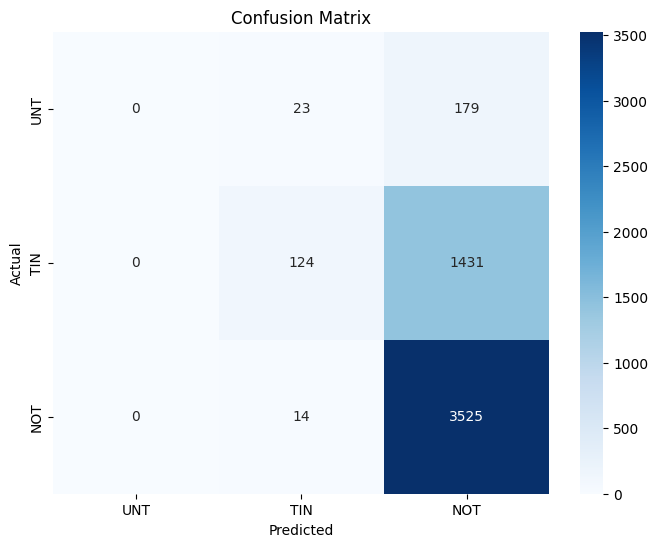

In [12]:
decision_tree_tfidf = TfidfVectorizer()
x_d = decision_tree_tfidf.fit_transform(data['tweet_clean'])

x_train_d,x_val_d,y_train_d,y_val_d = train_test_split(x_d,data['label'], test_size=0.4,random_state=67)

decision_tree_model = DecisionTreeClassifier()
naive_bayes_model.fit(x_train_d,y_train_d)

y_predict_d = naive_bayes_model.predict(x_val_d)
decision_model_classification = classification_report(y_val_d, y_predict_d)
accuracy_decision_tree = accuracy_score(y_val_d, y_predict_d)

print("Classification Report Using Decision Tree Classifier")
print(decision_model_classification)
print("Accuracy of Decision Tree Classifier =",accuracy_decision_tree)
print(" ")

cm = confusion_matrix(y_val_d, y_predict_d, labels=data['label'].unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['label'].unique(), yticklabels=data['label'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Now using test dataset for prediction
predict_data = pd.read_csv('test.csv')
X_test = naive_tfide.transform(predict_data['tweet'])
predictions_decision_tree = naive_bayes_model.predict(X_test)
predict_data['Prediction_decision_tree'] = predictions_decision_tree
predict_data.to_csv('decision_tree_model.csv', index=False)
#predict_data.to_csv('/prediction_output.csv', index=False)
print(predictions_naive_bayes)

['NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'TIN' 'TIN' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'N

In [14]:
print("Accuracy of logistic regression =",accuracy_logistic)
print("Accuracy of Naive Byes =",accuracy_naive_byes)
print("Accuracy of Decision Tree Classifier =",accuracy_decision_tree)

Accuracy of logistic regression = 0.7348942598187311
Accuracy of Naive Byes = 0.6867447129909365
Accuracy of Decision Tree Classifier = 0.6890105740181269
